In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
df = pd.read_csv('train_baseline.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
client_id           73799 non-null int64
education           73492 non-null object
sex                 73799 non-null object
age                 73799 non-null int64
car                 73799 non-null object
car_type            73799 non-null object
decline_app_cnt     73799 non-null int64
good_work           73799 non-null int64
bki_request_cnt     73799 non-null int64
home_address        73799 non-null int64
work_address        73799 non-null int64
income              73799 non-null int64
foreign_passport    73799 non-null object
default             73799 non-null int64
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [52]:
df.head(15)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
5,41415,SCH,M,27,Y,N,0,1,0,1,1,15000,N,0
6,28436,SCH,M,39,N,N,0,0,0,1,2,28000,N,0
7,68769,SCH,F,39,N,N,0,0,1,2,3,45000,N,0
8,38424,SCH,F,50,Y,N,1,0,0,1,1,30000,N,0
9,4496,UGR,F,54,N,N,0,0,1,2,3,24000,N,0


In [53]:
df.columns

Index(['client_id', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'bki_request_cnt', 'home_address',
       'work_address', 'income', 'foreign_passport', 'default'],
      dtype='object')

In [54]:
bin_cols = [ 'sex', 'car', 'car_type','good_work', 'foreign_passport']

categ_cols = ['education', 'home_address', 'work_address']

num_cols = [ 'age', 'decline_app_cnt','bki_request_cnt', 'income']

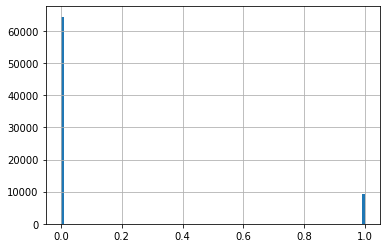

In [55]:
df.default.hist(bins = 100)

In [56]:
df.isnull().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

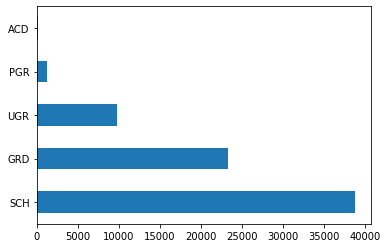

In [57]:
df['education'].value_counts().plot.barh()

In [58]:
df['education'].describe()

count     73492
unique        5
top         SCH
freq      38860
Name: education, dtype: object

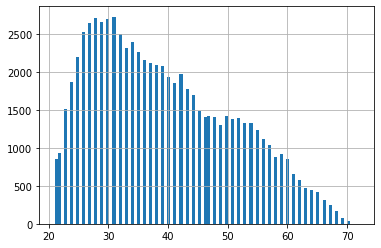

In [59]:
df.age.hist(bins = 100)

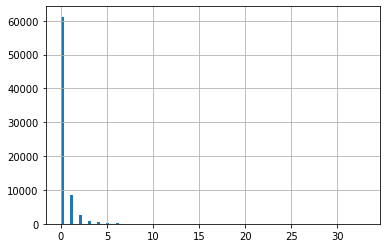

In [60]:
df.decline_app_cnt.hist(bins = 100)

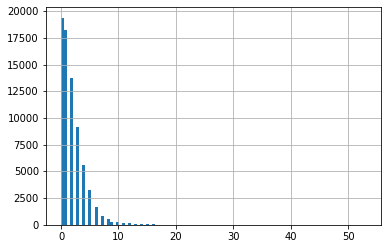

In [61]:
df.bki_request_cnt.hist(bins = 100)

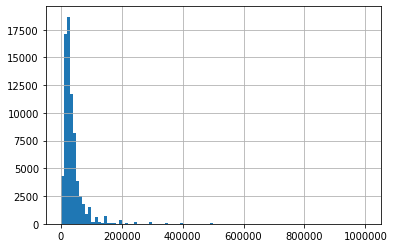

In [62]:
df.income.hist(bins = 100)

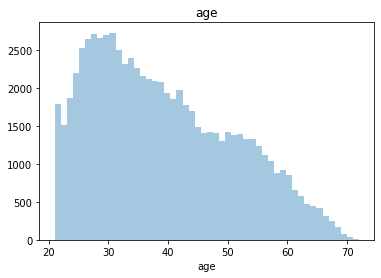

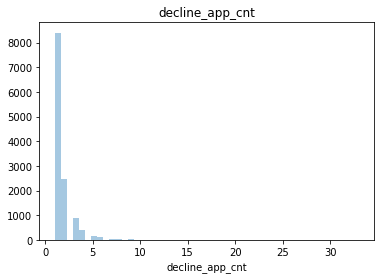

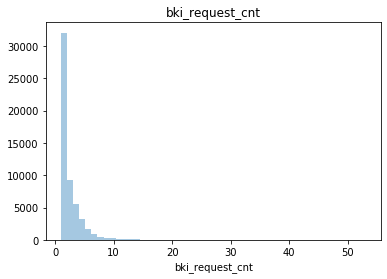

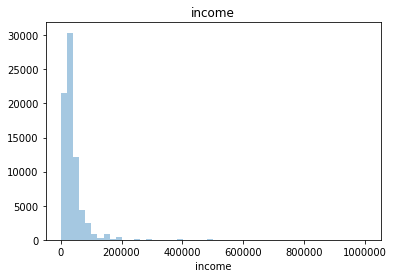

In [63]:
for i in num_cols:
    plt.figure()
    sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

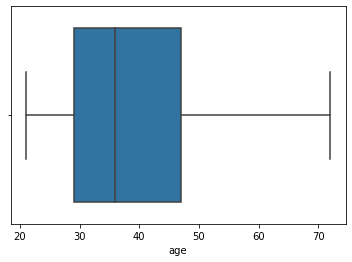

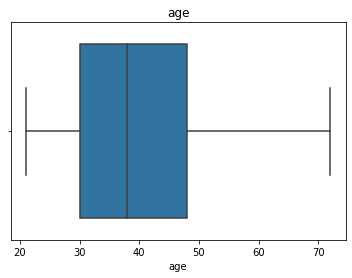

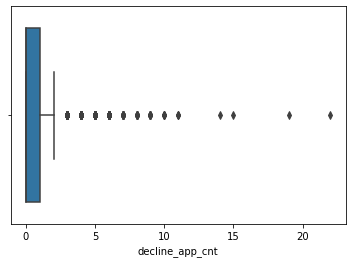

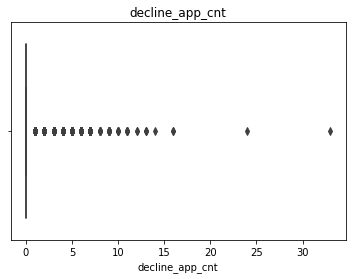

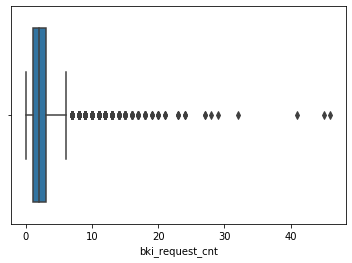

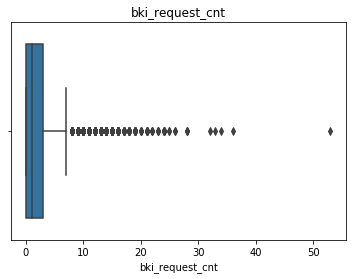

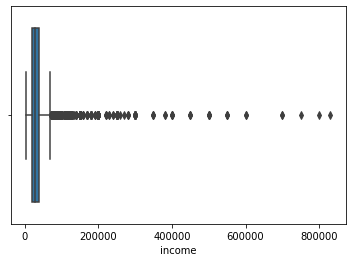

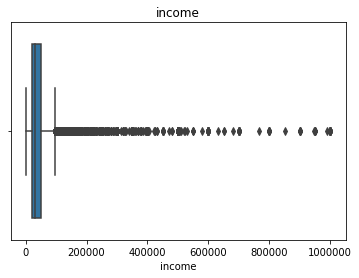

In [64]:
for i in num_cols:
    plt.figure()
    sns.boxplot(df[i].loc[df['default'] == 1])
    plt.figure()
    sns.boxplot(df[i].loc[df['default'] == 0])
    plt.title(i)
    plt.show()

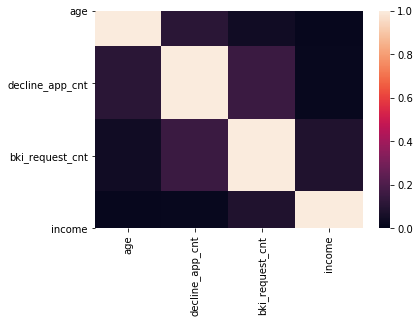

In [65]:
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1)

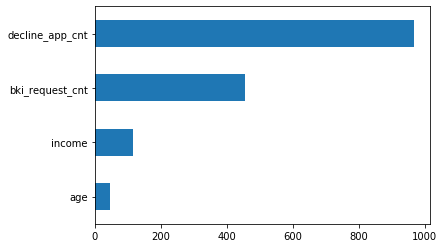

In [66]:
#значимость признаков на основе дисперсионного анализа. значение f-статистики. Чем значение статистики выше, 
#тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели.
imp_num = pd.Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [67]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [68]:
for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])
    
# убедимся в преобразовании    
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0


In [69]:
df.education.unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

In [70]:
educ_dict = { 'PGR': '1',
             'SCH': '2',
             'GRD': '3',
             'UGR': '4',
             'ACD': '5'}
df['education'] = df['education'].replace(to_replace=educ_dict)
df.isnull().sum()


client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

In [71]:
df['education'] = df['education'].fillna('2')
df['education'].unique()
pd.to_numeric(df['education'])

0        2
1        2
2        2
3        2
4        3
        ..
73794    3
73795    2
73796    2
73797    2
73798    3
Name: education, Length: 73799, dtype: int64

In [72]:
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,2,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,2,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,2,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,2,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,3,1,48,0,0,0,1,1,2,3,30000,1,0


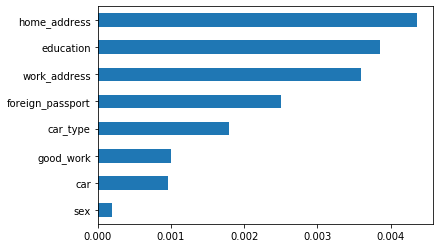

In [73]:
imp_cat = pd.Series(mutual_info_classif(df[bin_cols + categ_cols], df['default'],
                                     discrete_features =True), index = bin_cols + categ_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [74]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[categ_cols].values)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [75]:
len(X_cat[0])

11

In [76]:
X_num = StandardScaler().fit_transform(df[num_cols].values)

In [77]:
X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


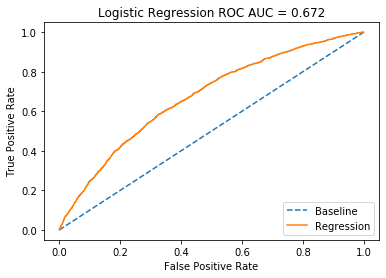

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
#brand
        brand = page.find(itemprop = 'brand')
        if brand is None:
            data_train.at[counter, 'brand'] = None
        else:
            data_train.at[counter, 'brand'] = brand['content']

    # color
        color = page.find(itemprop = 'color')
        if color is None:
            data_train.at[counter,'color'] = None
        else:
            data_train.at[counter,'color'] = color['content']

    # fuel type
        fuel = page.find(itemprop = 'fuelType')
        if fuel is None:
            data_train.at[counter,'fuelType'] = None
        else:
            data_train.at[counter,'fuelType'] = fuel['content']

    # model date
        model_date = page.find(itemprop = 'modelDate')
        if model_date is None:
            data_train.at[counter,'modelDate'] = None
        else:
            data_train.at[counter,'modelDate'] = model_date['content']
    
    # number of doors
        doors = page.find(itemprop = 'numberOfDoors')
        if doors is None:
            data_train.at[counter,'numberOfDoors'] = None
        else:
            data_train.at[counter,'numberOfDoors'] = doors['content']
    
    # production date
        prod_date = page.find(itemprop = 'productionDate')
        if prod_date is None:
            data_train.at[counter,'productionDate'] = None
        else:
            data_train.at[counter,'productionDate'] = prod_date['content']
    
    # vehicle transmission
        trans = page.find(itemprop = 'vehicleTransmission')
        if trans is None:
            data_train.at[counter,'vehicleTransmission'] = None
        else:
            data_train.at[counter,'vehicleTransmission'] = trans['content']
    
    # engine displacement
        engine_ltr = page.find(itemprop = 'engineDisplacement')
        if engine_ltr is None:
            data_train.at[counter,'engineDisplacement'] = None
        else:
            data_train.at[counter,'engineDisplacement'] = engine_ltr['content']
    
    # engine power
        engine_pwr = page.find(itemprop = 'enginePower')
        if engine_pwr is None:
            data_train.at[counter,'enginePower'] = None
        else:
            data_train.at[counter,'enginePower'] = engine_pwr['content']
    
    # mileage
        mileage = page.find(class_ = 'CardInfoRow CardInfoRow_kmAge')
        if mileage is None:
            data_train.at[counter,'mileage'] = None
        else:
            mileage = mileage.text.replace('Пробег', '')
            mileage = mileage.replace('\xa0', '')
            mileage = mileage.replace('км', '')
            data_train.at[counter,'mileage'] = mileage
    
    # drive type
        drive = page.find(class_ = 'CardInfoRow CardInfoRow_drive')
        if drive is None:
            data_train.at[counter,'Привод'] = None
        else:
            drive = drive.text.replace('Привод', '')
            data_train.at[counter,'Привод'] = drive
    
    # wheel
        wheel = page.find(class_ = 'CardInfoRow CardInfoRow_wheel')
        if wheel is None:
            data_train.at[counter,'Руль'] = None
        else:
            wheel = wheel.text.replace('Руль', '')
            data_train.at[counter,'Руль'] = wheel

    # owners
        owners = page.find(class_ = 'CardInfoRow CardInfoRow_ownersCount')
        if owners is None:
            data_train.at[counter,'Владельцы'] = None
        else:
            owners = owners.text.replace('Владельцы', '')
            owners = owners.replace('\xa0', '')
            data_train.at[counter,'Владельцы'] = owners

    # vehicle certificate
        certificate = page.find(class_ = 'CardInfoRow CardInfoRow_pts')
        if certificate is None:
            data_train.at[counter,'ПТС'] = None
        else:
            certificate = certificate.text.replace('ПТС', '')
            data_train.at[counter,'ПТС'] = certificate
    
    # price
        price = page.find(class_ = 'OfferPriceCaption__price')
        if price is None:
            data_train.at[counter,'price'] = None
        else:
            price = price.text.replace('\xa0', '')
            price = price.replace('₽', '')
            data_train.at[counter,'price'] = price
        